<a href="https://colab.research.google.com/github/mrklees/learning-agents/blob/master/First_Steps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# First Steps into RL

As a getting started, let's walk through the [tutorial written by Arthur Juliani on Medium.](https://medium.com/emergent-future/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0)  It will give us a nice, practical orientation to the subject.  It focuses on using games from the OpenAI gym as a testing ground.  

## First Algorithm: Q-Learning with a table of values
In these first few notebooks we will be learning about the Q-Learning algorithm. The first example is the simplest case, and doesn't even use a neural network, but will hopefully give us a bit of intuition about what later implementations of the algorithm are doing.

So how does the algorithm work.  Our Q-table maps every possible state/action combination to a reward. Each state is encoded in the rows and actions in the columns.  This becomes more concrete if we introduce our game: Frozen Lake. 

Frozen Lake is a game consisting of a 4 by 4 grid.  Our agent is placed on one side of the grid and must navigate the grid to a goal across the grid. There are some obstacles as well which kill the agent upon running into them.

The Q-Table will clearly be (4x4=) 16 rows (denoted $s$) with 4 columns (denoted $a$), which we will initialize at 0.  It is then updated after each step per the Bellman equation.  

$$ Q(s, a) = r + \gamma(max(Q(s', a')) $$

In English, this says that the value of each entry in the table, $Q(s, a)$, is given by the current known reward $r$ plus the maximum possible reward for the next state ($s'$) we would end up in. $\gamma$ serves as a discount rate, which gives a dial to scale how important future rewards are compared to the present reward.

In [0]:
# lol, gym is already installed in the Collab environment
import gym
import numpy as np
import pandas as pd

In [0]:
env = gym.make("FrozenLake-v0")

## Q- Table Learning Algorithm

In [0]:
# gym nicely tells us how many possible states and actions there are
n_states, n_actions = env.observation_space.n, env.action_space.n

In [50]:
env.reset()

env.env.render()

print(env.step(0))

env.env.render()

print(env.step(0))

env.env.render()

print(env.step(0))

env.env.render()


SFFF
FHFH
FFFH
HFFG
(0, 0.0, False, {'prob': 0.3333333333333333})
  (Left)
SFFF
FHFH
FFFH
HFFG
(0, 0.0, False, {'prob': 0.3333333333333333})
  (Left)
SFFF
FHFH
FFFH
HFFG
(4, 0.0, False, {'prob': 0.3333333333333333})
  (Left)
SFFF
FHFH
FFFH
HFFG


In [38]:
np.random.randn(1, n_actions)*(1./(1000+1))

array([[ 0.00091367, -0.00082924, -0.00064851,  0.0002012 ]])

In [69]:
# We initialize the values at 0 for all state/actions
Q = np.zeros([n_states, n_actions])

# Learning Parameters
lr = 0.8 # scales the step we take to update our table
y = 0.95 # The discount rate used in the Bellman Equation
num_episodes = 2000 # number of times to train on the env
max_timesteps = 99 # max number of tries to solve the puzzle in one episode
# Track the rewards by episode
r_trace = []
for i in range(num_episodes):
    # Reset environment and get first new observation
    s = env.reset()
    r_all = 0
    d = False
    j = 0
    # The Q-Table learning algorithm
    for j in range(max_timesteps):
        # Choose the best action from the Q-table, though allow for some noise.
        # Notice that the (1 / (i+1)) term shrinks the noise values as the number
        # of episodes increases.  Quite similar to the idea in simulated annealing!
        a = np.argmax(Q[s,:] + np.random.randn(1, n_actions)*(1./(i+1)))
        # Get new state and reward from the environment
        s1, r, done, _ = env.step(a)
        # Update Q-Table with new knowledge
        Q[s, a] = Q[s, a] + lr*(r + y*np.max(Q[s1, :]) - Q[s, a])
        r_all += r
        s = s1
        if done:
            #print(f"Episode finished after {j+1} timesteps")
            break
    r_trace.append(r_all)

trace = pd.DataFrame(dict(rewards = r_trace))
print(f"Score over time: {sum(r_trace)/num_episodes}")
print("Final Q-Table Values")
print(Q)

Score over time: 0.53
Final Q-Table Values
[[2.75209132e-01 4.70601114e-03 5.57505785e-03 7.69132537e-03]
 [1.05648590e-03 4.49649833e-04 1.88650298e-03 1.61839381e-01]
 [1.07919332e-03 8.99755052e-04 2.92565520e-03 1.49104865e-01]
 [1.41755535e-04 0.00000000e+00 3.49782728e-04 8.38215713e-02]
 [4.98965013e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.08272609e-02 1.54206891e-04 1.92847537e-04 3.05503075e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 5.92021800e-01]
 [0.00000000e+00 6.82157567e-01 4.44141869e-03 0.00000000e+00]
 [1.08055756e-01 2.88248371e-04 4.09911225e-04 7.70410126e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.35170401e-03 4.88804738e-03 9.04738048e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.53986229e-01 6.96127971e-03]
 [0.00000000

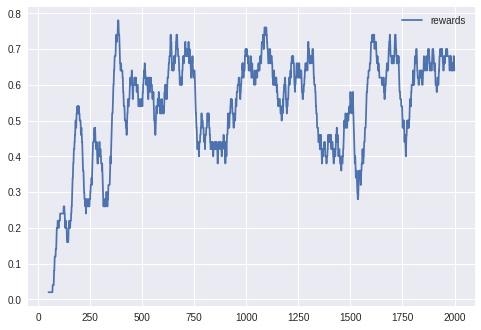

In [71]:
# Rolling average over how frequently the agent found a reward. 
trace.rolling(50).mean().plot()

### For the future
Running this a few times and watching the trace, it is easy to see the stochastic nature of the agents.  Multiple runs don't necessarily converge with only 2000 episodes. There are also built in parameters, like the discount rate, which we could vary in order to vary the agent.  Which are the optimal parameter values is not at all clear.

When we revisit this, we will try to refactor the code to more easily allow us to explore the space of possible agents.

## Neural Network based approach

There are clear limitation to the scalability of a table-like approach like the one above.  A neural network will more flexibly allow us to map sets of discrete (or continuous) states to reward values, and optimize the network in a way that we're already familiar. 

In [0]:
import random
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
class QNetwork:
    def __init__(self, learning_rate=0.01, state_size=16, action_size=4, 
                 hidden_size=10, name="QNetwork"):
        with tf.variable_scope(name):
            # In this case we encode the input state as a one-hot encoded vector
            self.inputs_ = tf.placeholder(tf.float32, [None, state_size], name='inputs')

            # One hot encode the actions to later choose the Q-value for the action
            self.actions_ = tf.placeholder(tf.int32, [None], name='actions')
            one_hot_actions = tf.one_hot(self.actions_, action_size)

            # Target Q values for training
            self.targetQs_ = tf.placeholder(tf.float32, [None], name='target')

            # ReLU hidden layers
            self.fc1 = tf.contrib.layers.fully_connected(self.inputs_, hidden_size)
            self.fc2 = tf.contrib.layers.fully_connected(self.fc1, hidden_size)

            # Output with linear activate (remember we want predictions of reward, not probabilities)
            self.output = tf.contrib.layers.fully_connected(self.fc2, action_size, activation_fn=None)

            # Optimization
            self.Q = tf.reduce_sum(tf.multiply(self.output, one_hot_actions), axis=1)

            self.loss = tf.reduce_mean(tf.square(self.targetQs_  - self.Q))
            self.opt = tf.train.AdamOptimizer(learning_rate).minimize(self.loss)

In [0]:
# Hyperparameters

# Learning Parameters
num_episodes = 1000
max_timesteps = 99
y = 0.99

# Exploration Paramters
explore_start = 1.0     # What's the starting probability we perform a random move
explore_stop = 0.01     # Minimum probability 
decay_rate = 0.0001     # Rate at which we decay to the the minimum

# Network Parameters
hidden_size = 64        # Size of the hidden layer in the Q-network
learning_rate = 0.0001  # Learning rate of our optimizer

# Memory Paramters
memory_size = 10000
batch_size = 20

In [0]:
# Reset the graph
tf.reset_default_graph()
qnet = QNetwork(name='main', hidden_size=hidden_size, learning_rate=learning_rate)

In [0]:
#create lists to contain total rewards and steps per epsiode
j_trace = []
r_trace = []

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    for i in range(num_episodes):
        s = env.reset()
        r_all = 0
        done = False
        j = 0
        # Q Network Algorithm
        for j in range(max_timesteps):
            a, allQ = 
            if done:
                break
trace = pd.DataFrame(dict(steps=j_trace, reward=r_trace))